In [131]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
Loading the cleaned dataset

In [132]:
df = pd.read_csv("./Data/cleaned_alzheimer.csv")
df.drop(columns=["CDR", "Group"], inplace=True)
X = df
X

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,87,14,2.0,27.0,1987,0.696,0.883
1,0,88,14,2.0,30.0,2004,0.681,0.876
2,1,88,18,3.0,28.0,1215,0.710,1.444
3,1,90,18,3.0,27.0,1200,0.718,1.462
4,0,80,12,4.0,28.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...
312,0,82,16,1.0,28.0,1693,0.694,1.037
313,0,86,16,1.0,26.0,1688,0.675,1.040
314,1,61,13,2.0,30.0,1319,0.801,1.331
315,1,63,13,2.0,30.0,1327,0.796,1.323


# Elbow Plot
To find optimal K value

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce demensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [134]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca) 
    wcss.append(kmeans.inertia_)

<Axes: >

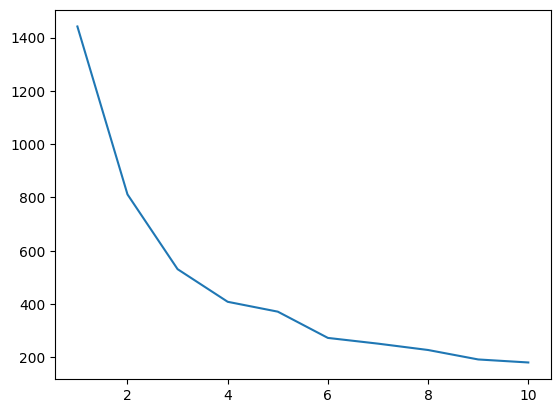

In [136]:
sns.lineplot(x = range(1, 11), y = wcss)

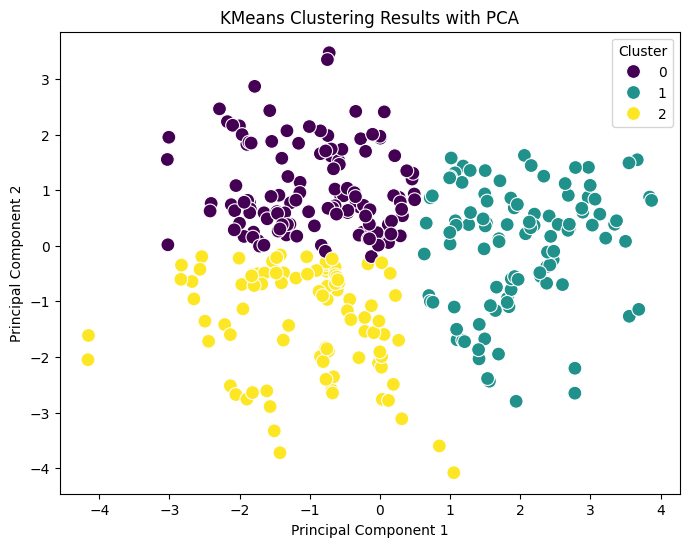

In [148]:
# Choose the number of clusters for KMeans (e.g., 2 or 3)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca)

# Add the clusters to the original data (optional)
# df['Cluster'] = clusters 

# Plot the PCA-transformed data with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100, markers=['x', 'o', 's', 'D'])
plt.title('KMeans Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
